# Supervised Learning

# 1. Classification
# a. Logistic Regression

In [5]:
# Step 1:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Loading the datasets
data = pd.read_csv("/content/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Step 2: Data Preproceessing
# Check for the null values

In [9]:
data.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:
# Since, our dataset has 0 null values, we can continue to the next step

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


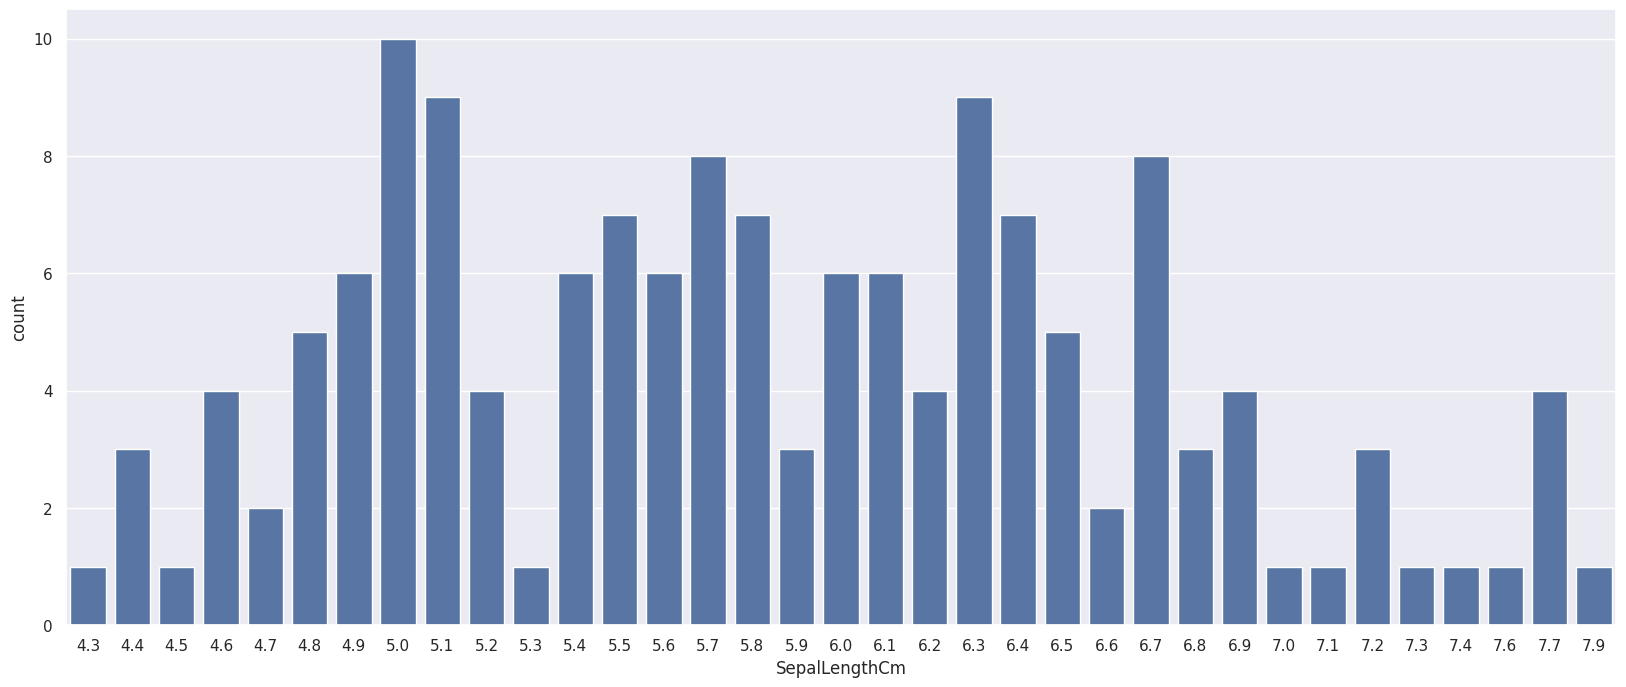

In [12]:
# Exploratory Data Analysis (EDA)
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(data=data,x='SepalLengthCm')
plt.show()

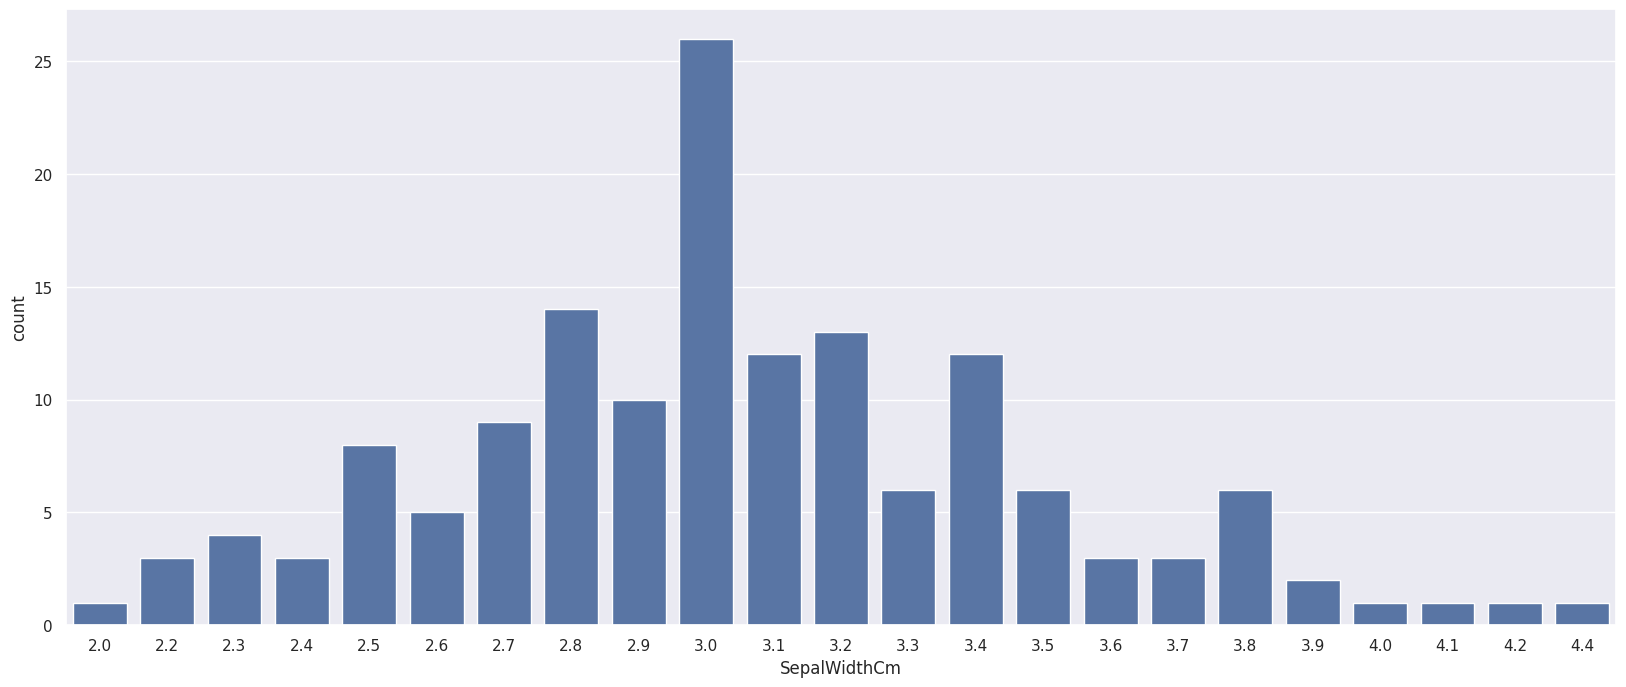

In [13]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(data=data,x='SepalWidthCm')
plt.show()

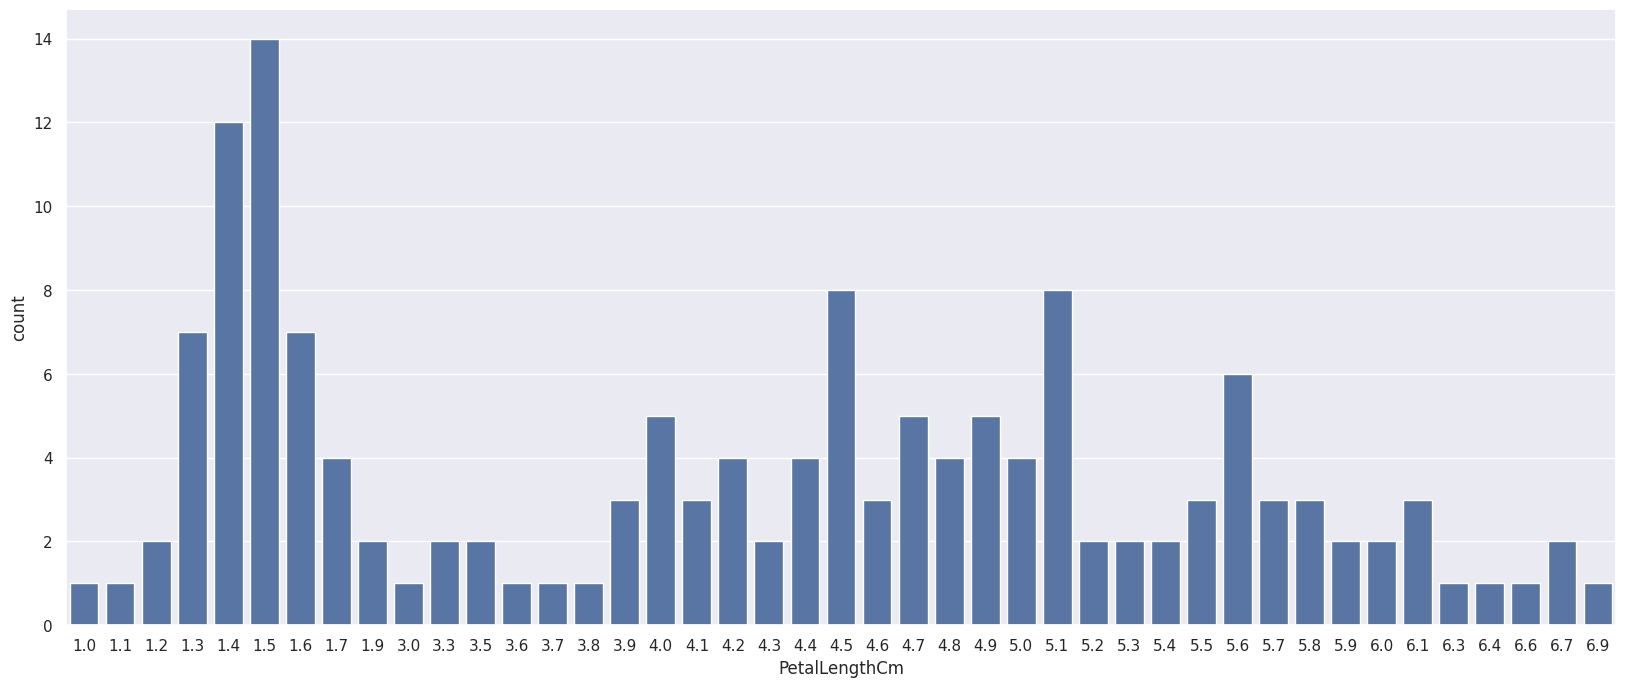

In [14]:

sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(data=data,x='PetalLengthCm')
plt.show()

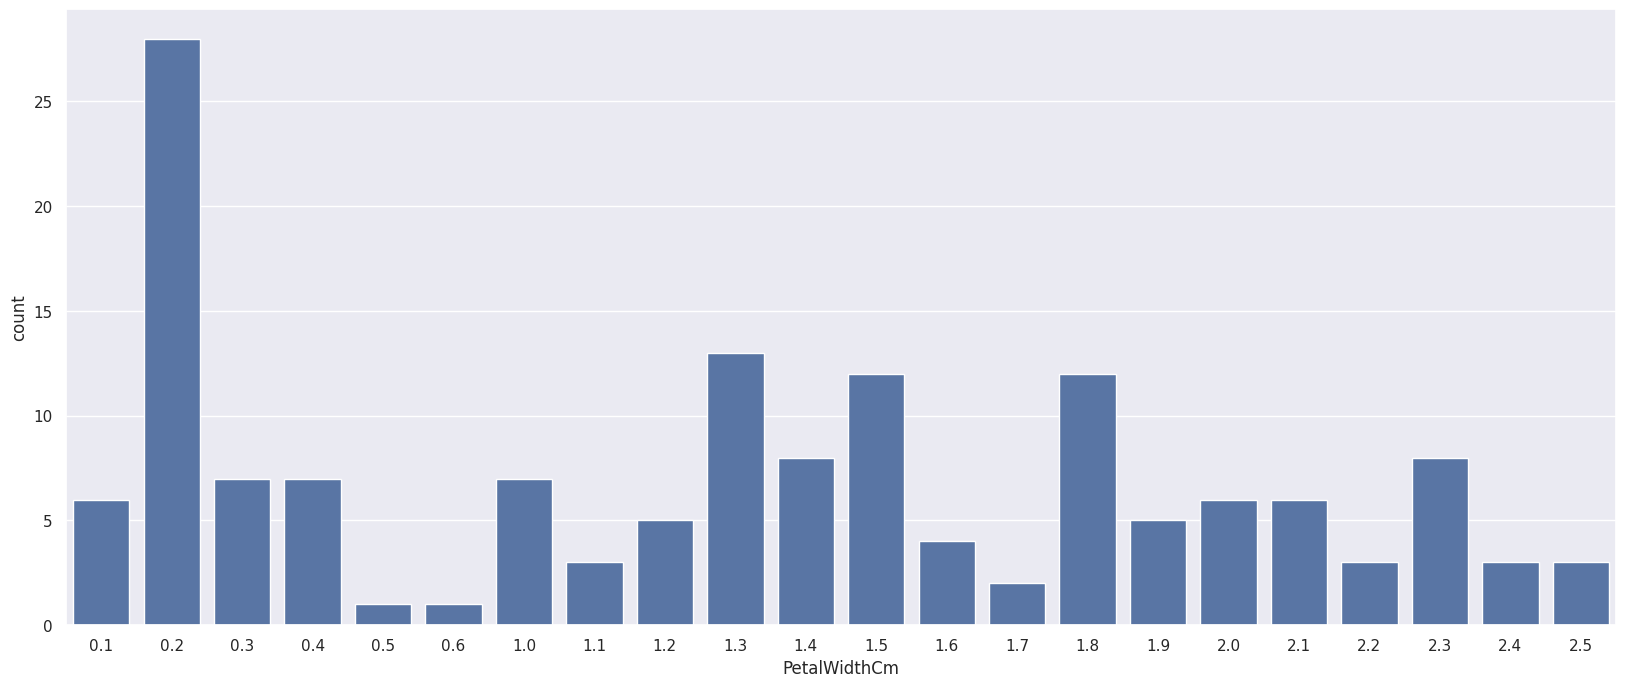

In [15]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(data=data,x='PetalWidthCm')
plt.show()

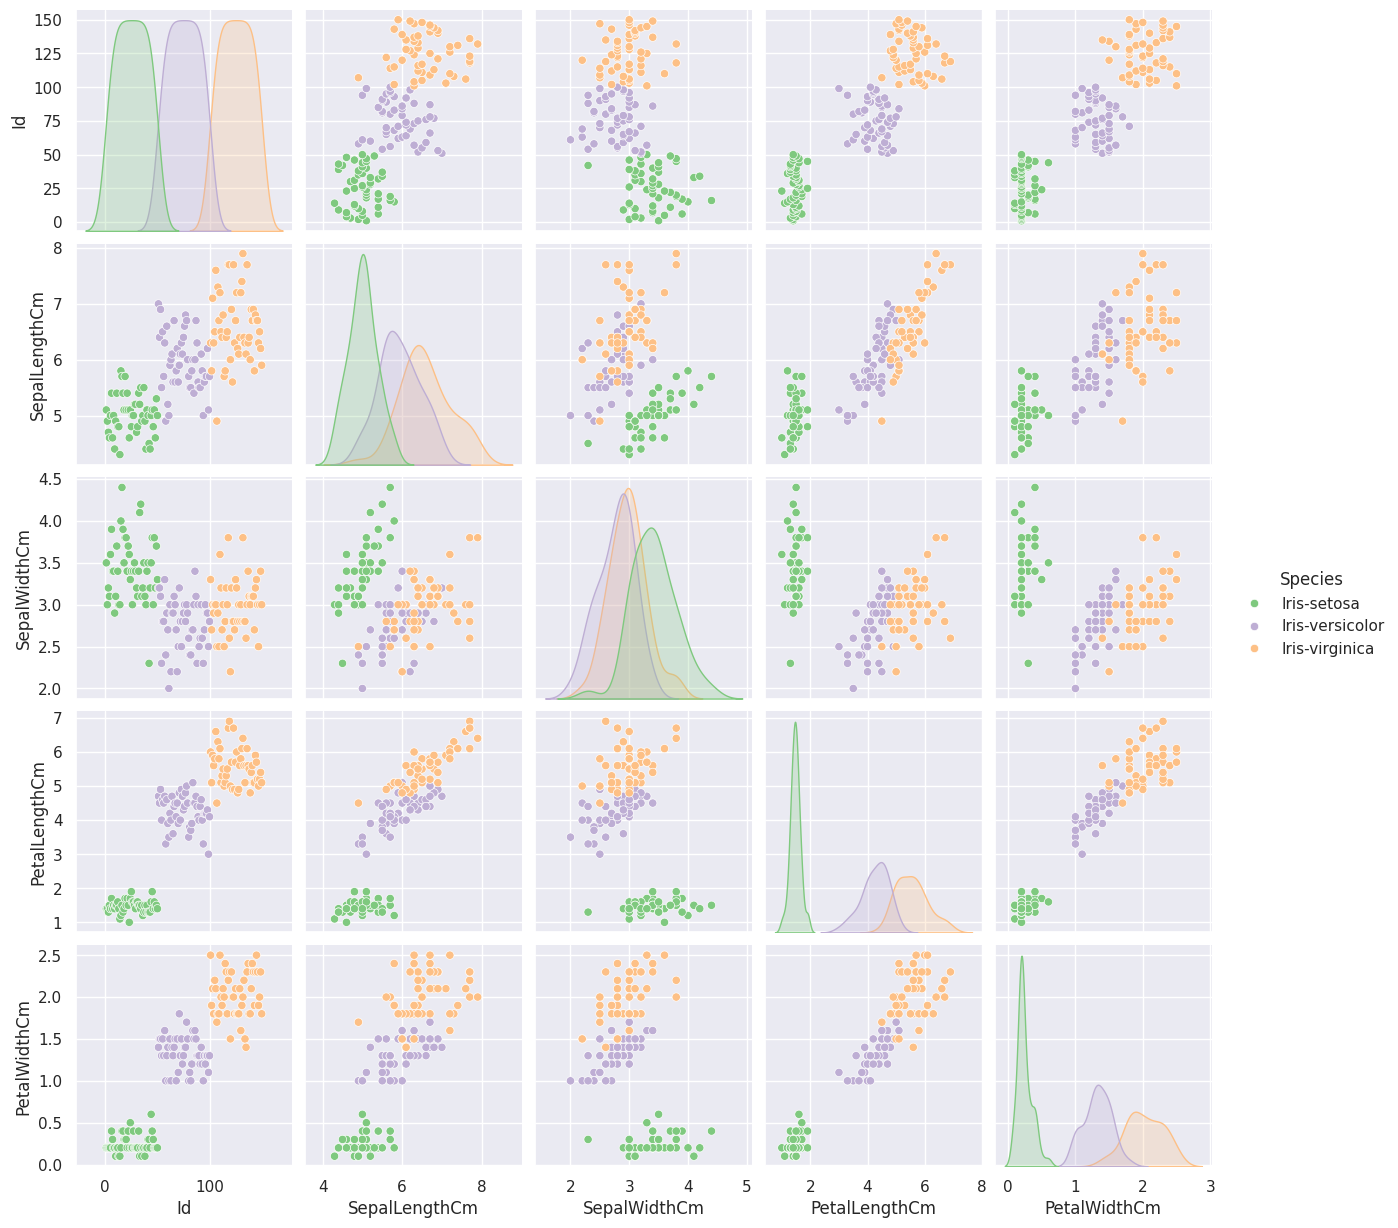

In [16]:
sns.pairplot(data=data,hue='Species',palette='Accent')
plt.show()

<ipython-input-17-cecd524666e7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=data,x='PetalWidthCm',palette='Accent')


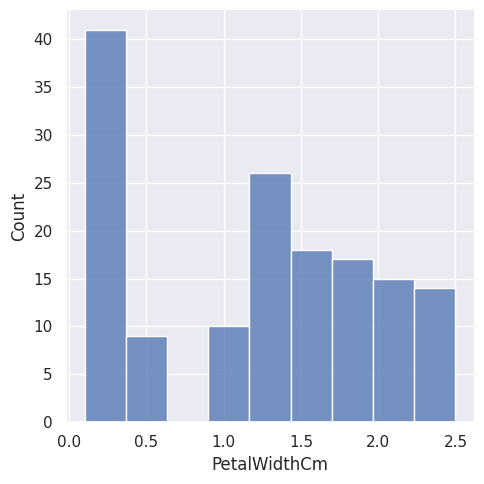

In [17]:
sns.displot(data=data,x='PetalWidthCm',palette='Accent')
plt.show()
sns.set(rc={'figure.figsize':(20,8)})

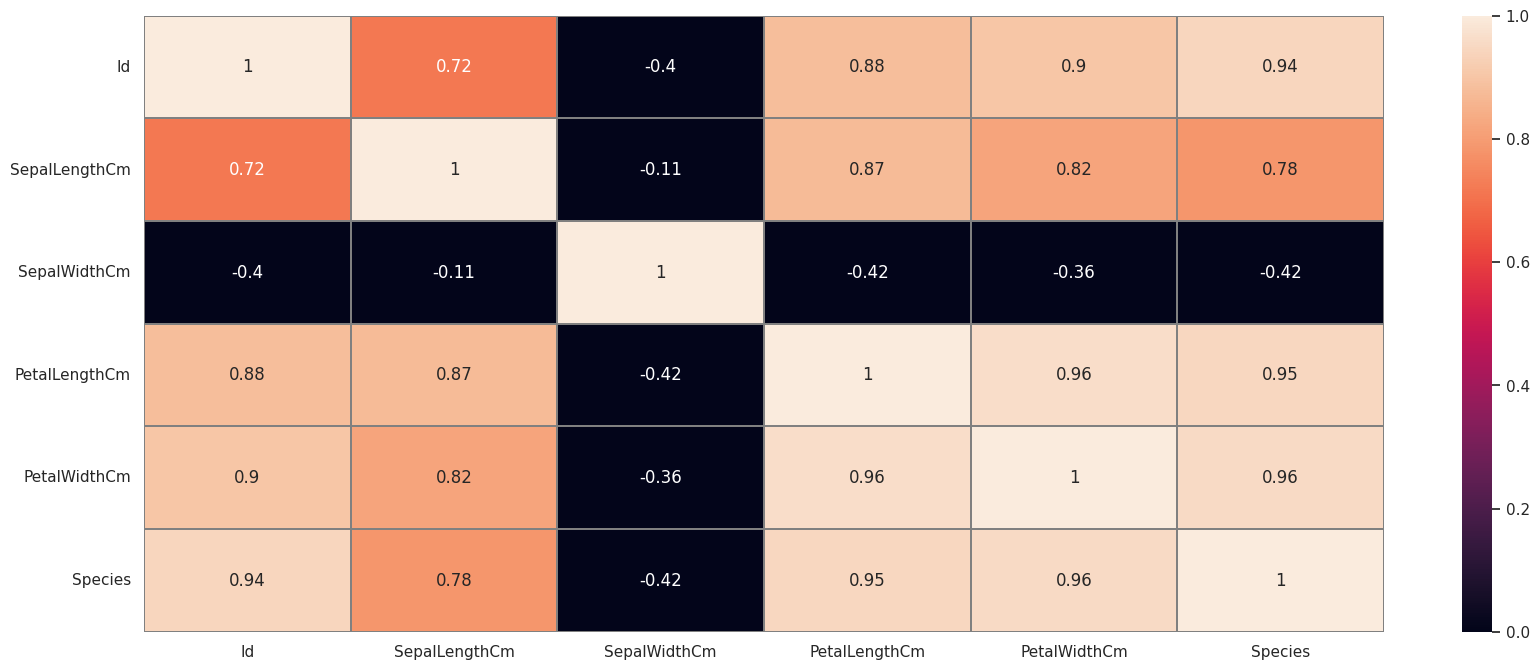

In [24]:
sns.heatmap(data.corr(),annot=True,linecolor='grey',linewidths=0.2,vmin=0,vmax=1)
sns.set(rc={'figure.figsize':(8,4)})

In [19]:
# Now separating the data to the categorical and numerical
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [20]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Species'], dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]


In [23]:
df = pd.DataFrame(data)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [25]:
#  Now lets Test, Train and Split the datasets
from sklearn.model_selection import train_test_split

# Assuming 'Category' is the target variable
X = data.drop('Species', axis=1)  # Features
y = data['Species']               # Target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,23,4.6,3.6,1.0,0.2
15,16,5.7,4.4,1.5,0.4
65,66,6.7,3.1,4.4,1.4
11,12,4.8,3.4,1.6,0.2
42,43,4.4,3.2,1.3,0.2
...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3
106,107,4.9,2.5,4.5,1.7
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


In [28]:
X_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3
118,119,7.7,2.6,6.9,2.3
78,79,6.0,2.9,4.5,1.5
76,77,6.8,2.8,4.8,1.4
31,32,5.4,3.4,1.5,0.4
64,65,5.6,2.9,3.6,1.3
141,142,6.9,3.1,5.1,2.3
68,69,6.2,2.2,4.5,1.5
82,83,5.8,2.7,3.9,1.2


In [29]:
y_train

,Species
22,0
15,0
65,1
11,0
42,0
...,...
71,1
106,2
14,0
92,1


In [30]:
y_test

,Species
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [31]:
print("Training feature set:\n", X_train)
print("Training target set:\n", y_train)
print("Testing feature set:\n", X_test)
print("Testing target set:\n", y_test)

Training feature set:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22    23            4.6           3.6            1.0           0.2
15    16            5.7           4.4            1.5           0.4
65    66            6.7           3.1            4.4           1.4
11    12            4.8           3.4            1.6           0.2
42    43            4.4           3.2            1.3           0.2
..   ...            ...           ...            ...           ...
71    72            6.1           2.8            4.0           1.3
106  107            4.9           2.5            4.5           1.7
14    15            5.8           4.0            1.2           0.2
92    93            5.8           2.6            4.0           1.2
102  103            7.1           3.0            5.9           2.1

[120 rows x 5 columns]
Training target set:
 22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Species, Length: 120, 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Initialize the model
logreg = LogisticRegression(max_iter=200)

# Train the model
logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [34]:
# Predict on the test set
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [38]:
# No dumpig and saving the model
import pickle

In [39]:
with open('iris_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [40]:
# Load the model
with open('iris_logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [44]:
import streamlit as st # type: ignore
import pickle
import numpy as np

# Load the saved model
with open('iris_logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Streamlit app
st.title("Iris Flower Classification")

st.write(""" Predict the Iris Flower Type
This app predicts the **Iris flower** type using Logistic Regression!
""")

# Input features
sepal_length = st.slider("Sepal Length", 4.0, 8.0, 5.1)
sepal_width = st.slider("Sepal Width", 2.0, 4.5, 3.5)
petal_length = st.slider("Petal Length", 1.0, 7.0, 1.4)
petal_width = st.slider("Petal Width", 0.1, 2.5, 0.2)

# Prediction
if st.button("Predict"):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(features)
    iris_type = iris.target_names[prediction[0]] # type: ignore
    st.write(f"The predicted Iris flower type is **{iris_type}**")


2024-08-09 06:32:55.296 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
